# Linear Regression Assignment - Boombikes

# Problem Statement
    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a minboombikesul business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal of the Assignment:
    You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

    The steps to be followed in this exercise are as follows:
    Reading, understanding and visualizing the data

    Preparing the data for model training (train-test split, rescaling)

    Training the model

    Residual analysis

    Prediction and evaluation of the test set


## Step 1: Reading and Understanding the Data

    Let's start with the following steps:

    1. Importing data using the pandas library
    2. Understanding the structure of the data

In [1]:
# importing all the supporting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Create a dataframe using the data set - reading the data

boombikes = pd.read_csv("day.csv")

In [3]:
# Read the first 5 elements to make sure the data set is read properly.
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# shape of the dataset to check the rows and columns
boombikes.shape

(730, 16)

In [5]:
# Describe the dataset
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Get the info from the dataset
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2 : Data Visualisation

#### Visualizing the numberic values
    As we can see below we will be choosing the numberic values that are important for the analysis and the other variables can be converted to categorical variables for better visualization in the later stage of this analysis.

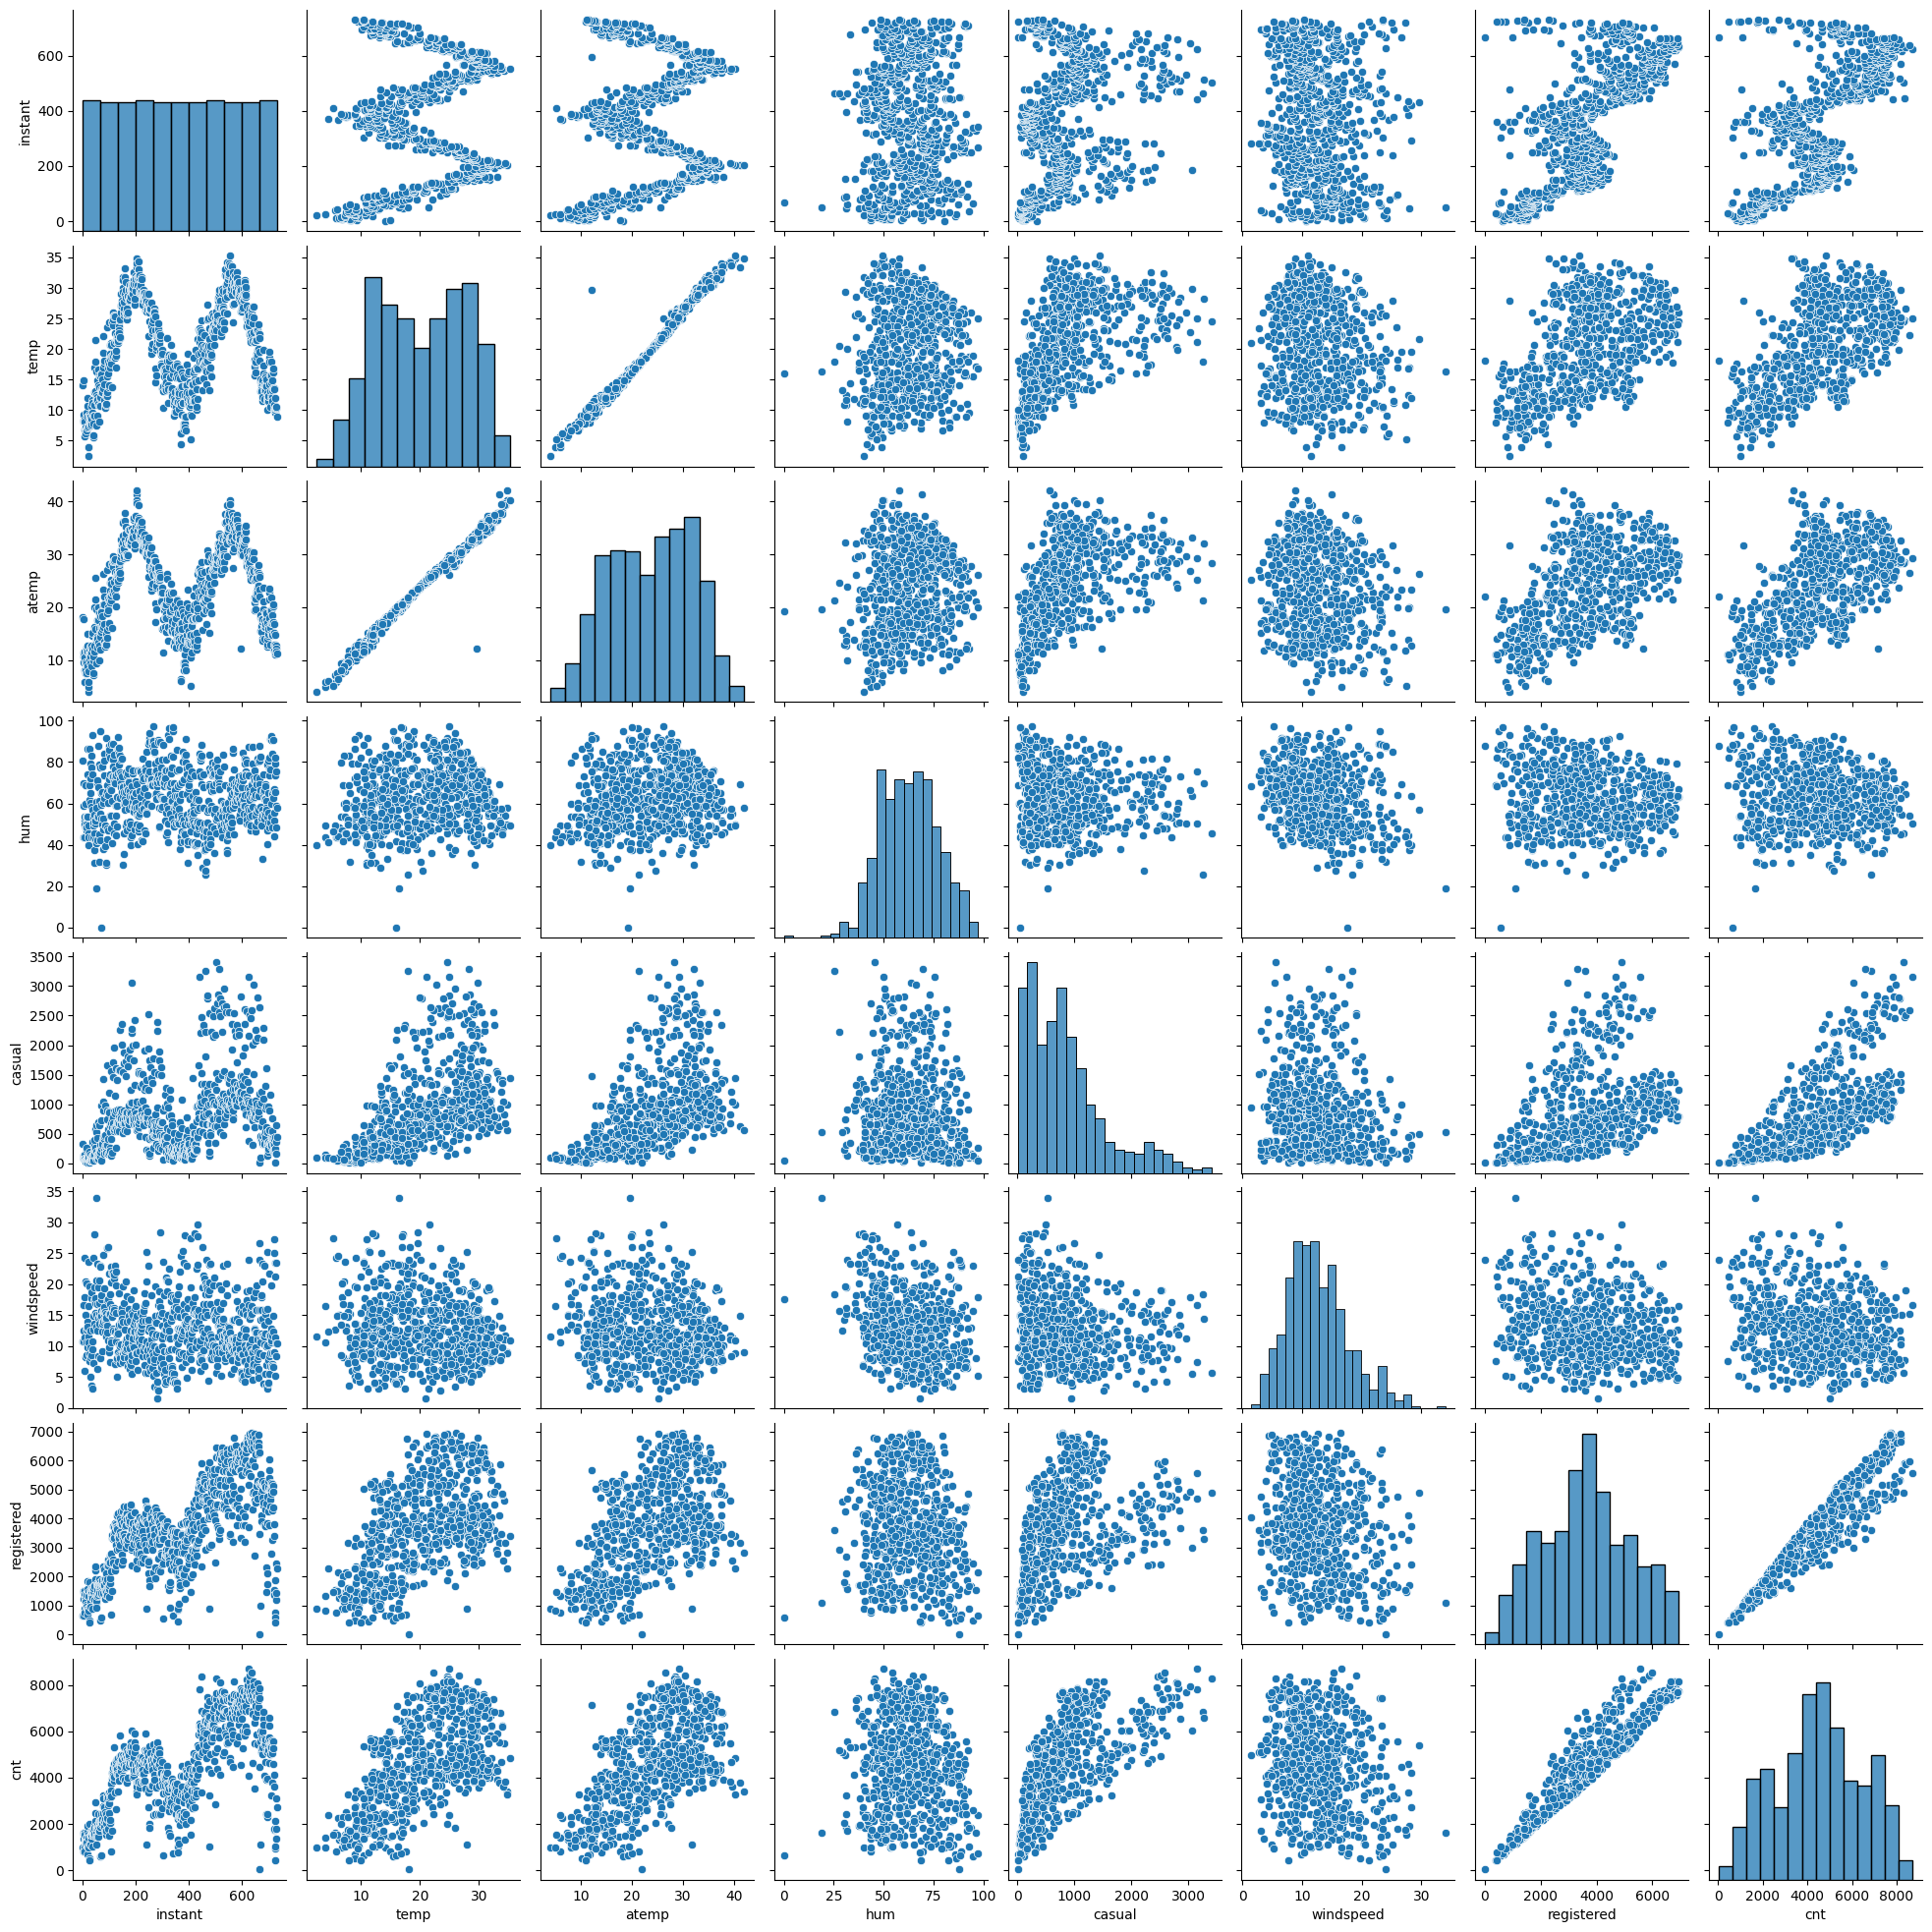

In [7]:
# visualize 
sns.pairplot(boombikes, vars=['instant',"temp", 'atemp', "hum",'casual','windspeed','registered','cnt'])
plt.show()

As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further.

### Data Dictionary :
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [8]:
# Lets map the categorical variables to the data strings provided in the Data Dictionary for better visualization analysis.
boombikes['season']=boombikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boombikes['mnth']=boombikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boombikes['weathersit']=boombikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boombikes['weekday']=boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


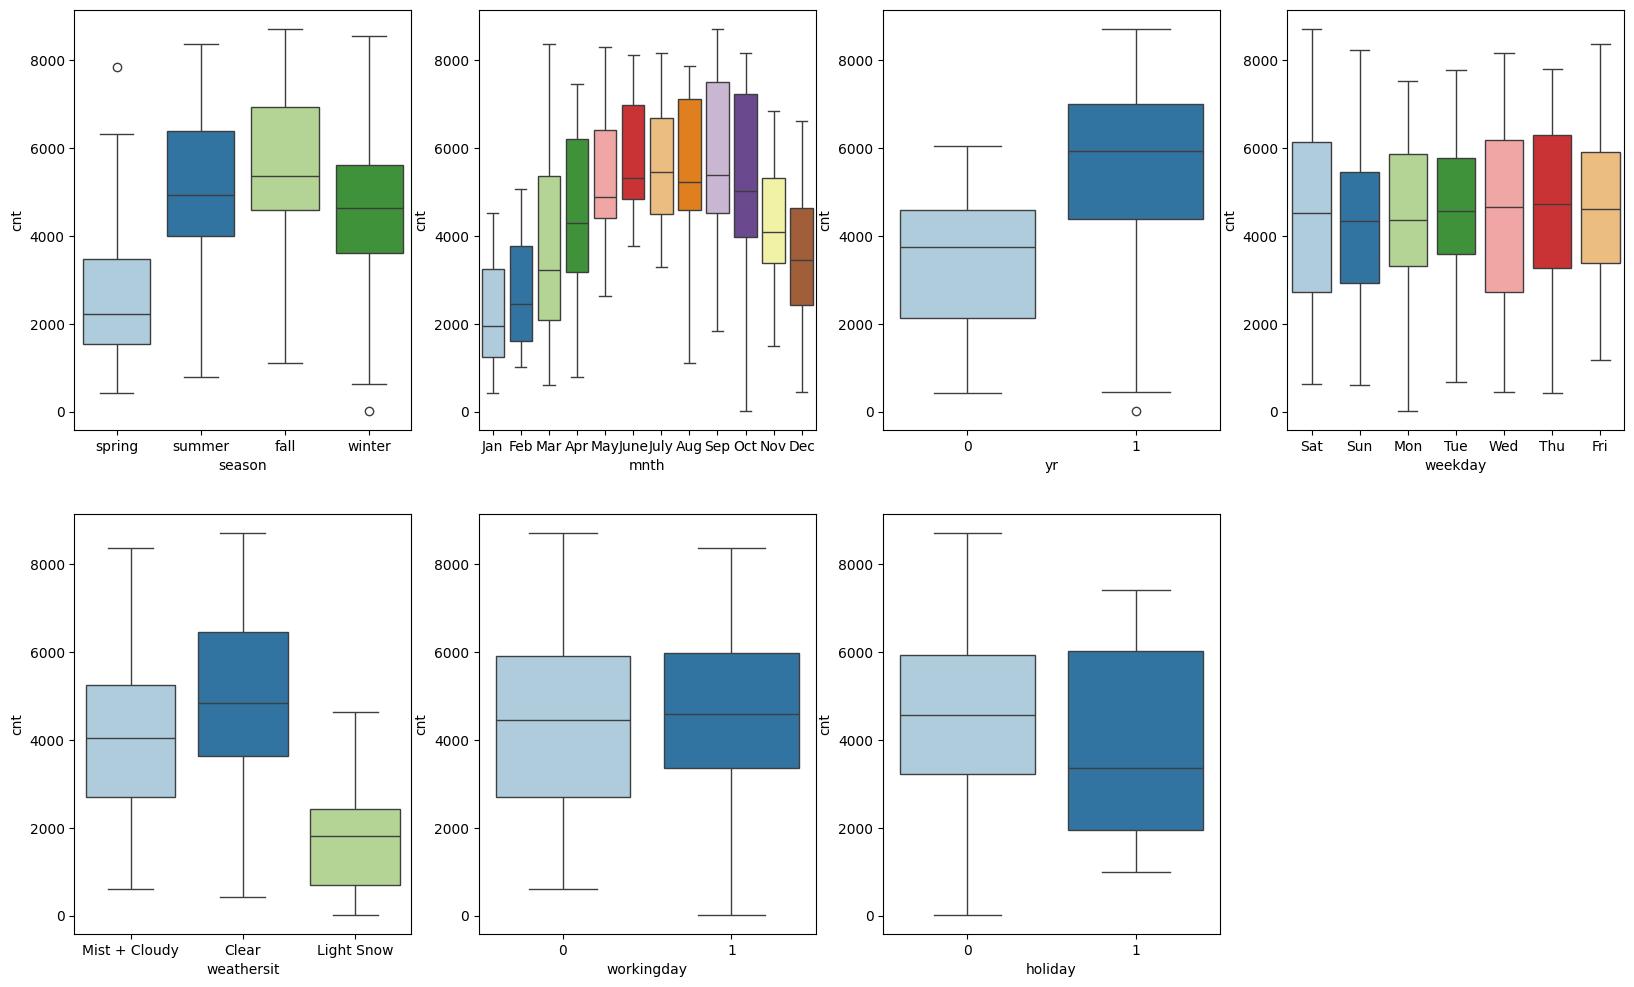

In [9]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=boombikes, palette="Paired")
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=boombikes, palette="Paired")
plt.subplot(2, 4, 3)
sns.boxplot(x='yr', y='cnt', data=boombikes, palette="Paired")
plt.subplot(2, 4, 4)
sns.boxplot(x='weekday', y='cnt', data=boombikes, palette="Paired")
plt.subplot(2, 4, 5)
sns.boxplot(x='weathersit', y='cnt', data=boombikes, palette="Paired")
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=boombikes, palette="Paired")
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=boombikes, palette="Paired")
plt.show()


#### Observations : 

    1. People are more likely to rent bikes in the summer and the fall season

    2. Bike rental rates are the most in September and October

    3. Saturday, Wednesday and Thursday are the days where more bikes are rented

    4. More bikes were rented in 2019

    5. Most bike rentals take place in the clear weather

    6. There is no big discernable difference in bike rental rates depending on whether it's a working day or not

    7. Bike rental rates are higher on holidays

### Lets deepdive in to each variable

#### 1. Season

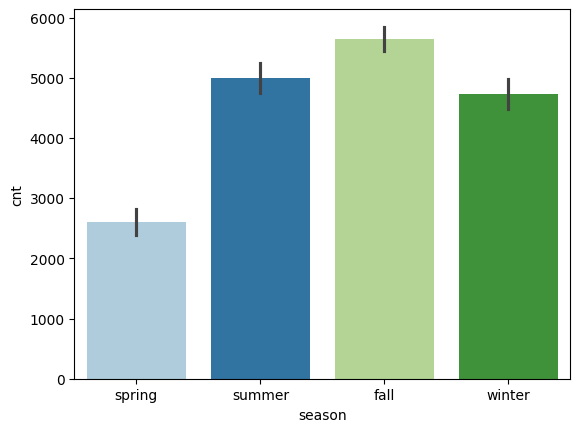

In [10]:
#Barplot to see relation between season and count of bike rentals
sns.barplot(x='season',y='cnt',data=boombikes,palette="Paired")
plt.show()

Observations : People are more likely to rent bikes in the summer and the fall season

#### 2. Year

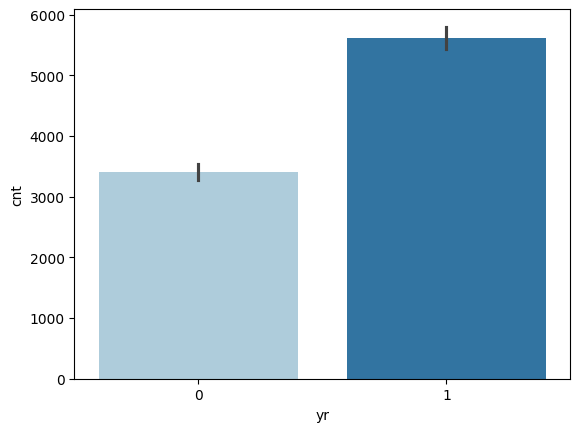

In [11]:
#Relation between Year and count of bike rentals
sns.barplot(x='yr',y='cnt',data=boombikes, palette="Paired")
plt.show()

Observations : Bike rentals are more in the year 2019 compared to 2018

#### 3. Month

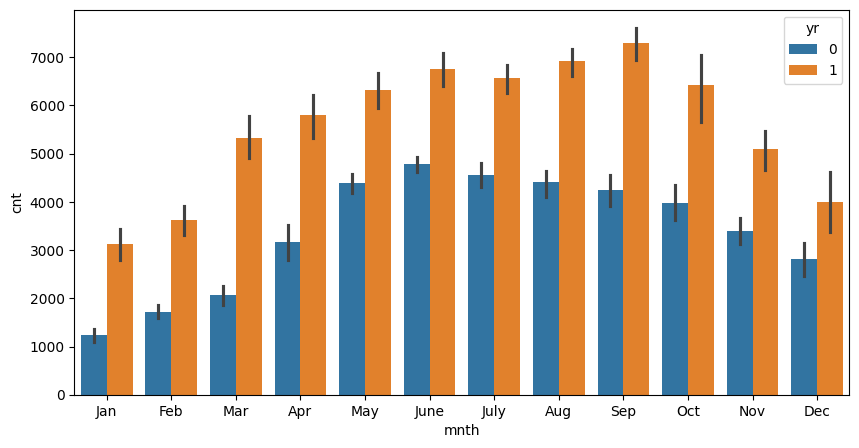

In [12]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot(x='mnth',y='cnt',hue='yr',data=boombikes)
plt.show()

Observations :  Bike rental rates are the most in September and October. Bike Rentals are more in the year 2019 compared to 2018

#### 4. Weathersit

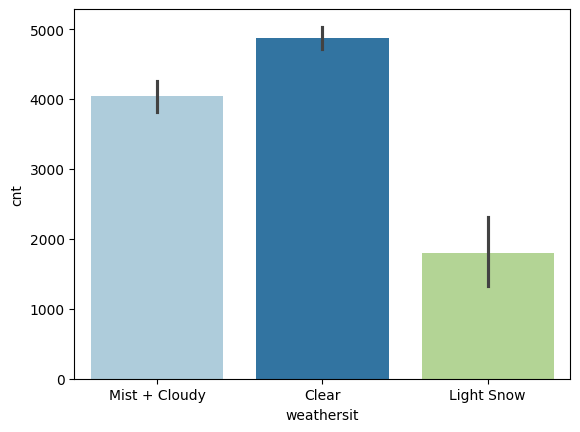

In [13]:
#Relation between weather and count of bike rentals
sns.barplot(x='weathersit', y='cnt', palette="Paired", data=boombikes)
plt.show()

Observations : Most bike rentals take place in the clear weather

#### 5. Temperature

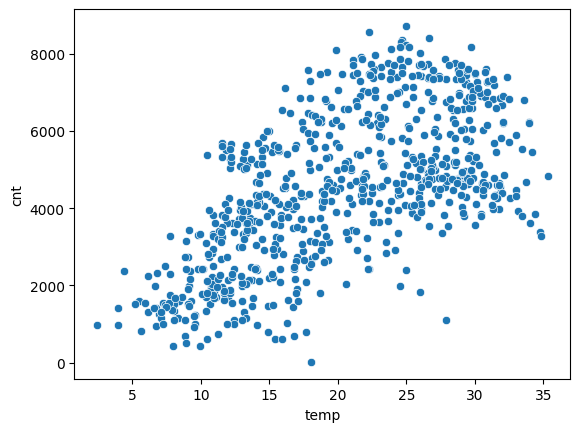

In [14]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='cnt' ,data=boombikes)
plt.show()

Observations: Bike Rentals are observed at higher temperatures

#### 6. Humidity

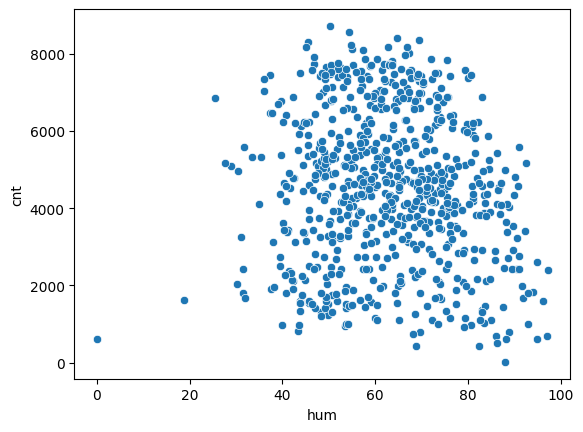

In [15]:
sns.scatterplot(x='hum', y='cnt',data=boombikes)
plt.show()

Observations : Bike rentals are more at high humidity

In [16]:
# Lets create a dataframe with numberical values
df = boombikes[['instant',"temp", 'atemp', "hum",'casual','windspeed','registered','cnt', "yr", "holiday", "workingday"]]

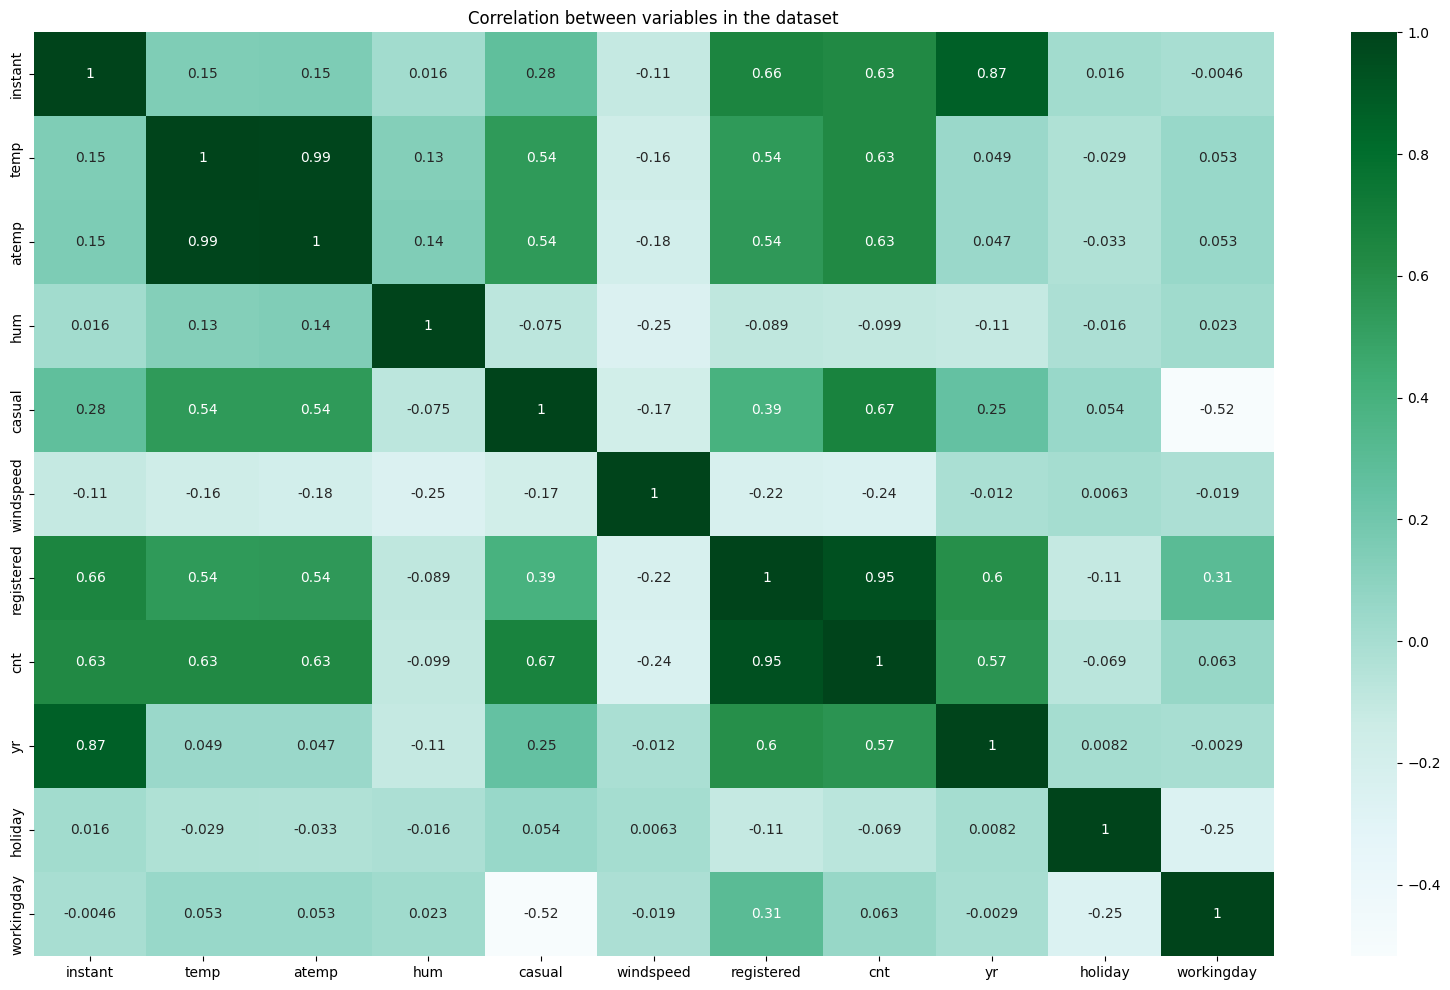

In [17]:
# Lets create a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='BuGn', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

Since we are considering cnt as target variable lets analyse the anove output. As we can see, there are several variables correlated to count variable (cnt) such as registered, casual, temp, atemp, yr, workingday, we can thereby conduct a linear regresssion model

In [18]:
# Lets drop the variables that are not required by the model for analysis. 
# As we can see the variables 'instant','dteday','casual', 'registered','atemp' are not requied for the analysis hence we need to drop them.
# atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis

boombikes = boombikes.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [19]:
# Lets check the datatypes for further analysis.
boombikes.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Step 3. Data Preparation

##### Dummy Variables

In [20]:
#creating dummy variables 
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(boombikes.mnth, drop_first=True)
weekday = pd.get_dummies(boombikes.weekday, drop_first=True)
weathersit = pd.get_dummies(boombikes.weathersit, drop_first=True)
season = pd.get_dummies(boombikes.season, drop_first=True)

In [21]:
#adding the dummy variables to the original dataframe
boombikes = pd.concat([boombikes,month, weekday, weathersit, season], axis=1)

boombikes.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,True,False,False


In [22]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
boombikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boombikes.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,True,False,False
5,0,0,1,8.378268,51.8261,6.000868,1606,False,False,False,...,False,False,True,False,False,False,False,True,False,False
6,0,0,1,8.057402,49.8696,11.304642,1510,False,False,False,...,False,False,False,False,False,False,True,True,False,False
7,0,0,0,6.765000,53.5833,17.875868,959,False,False,False,...,True,False,False,False,False,False,True,True,False,False
8,0,0,0,5.671653,43.4167,24.250650,822,False,False,False,...,False,True,False,False,False,False,False,True,False,False
9,0,0,1,6.184153,48.2917,14.958889,1321,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
# We need the data to be in 0s and 1s heance we will be converting all the True False to numerical values
boombikes = boombikes.applymap(lambda x: int(x) if isinstance(x, bool) else x)
boombikes.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Shape if the edited dataframe.

boombikes.shape

(730, 29)

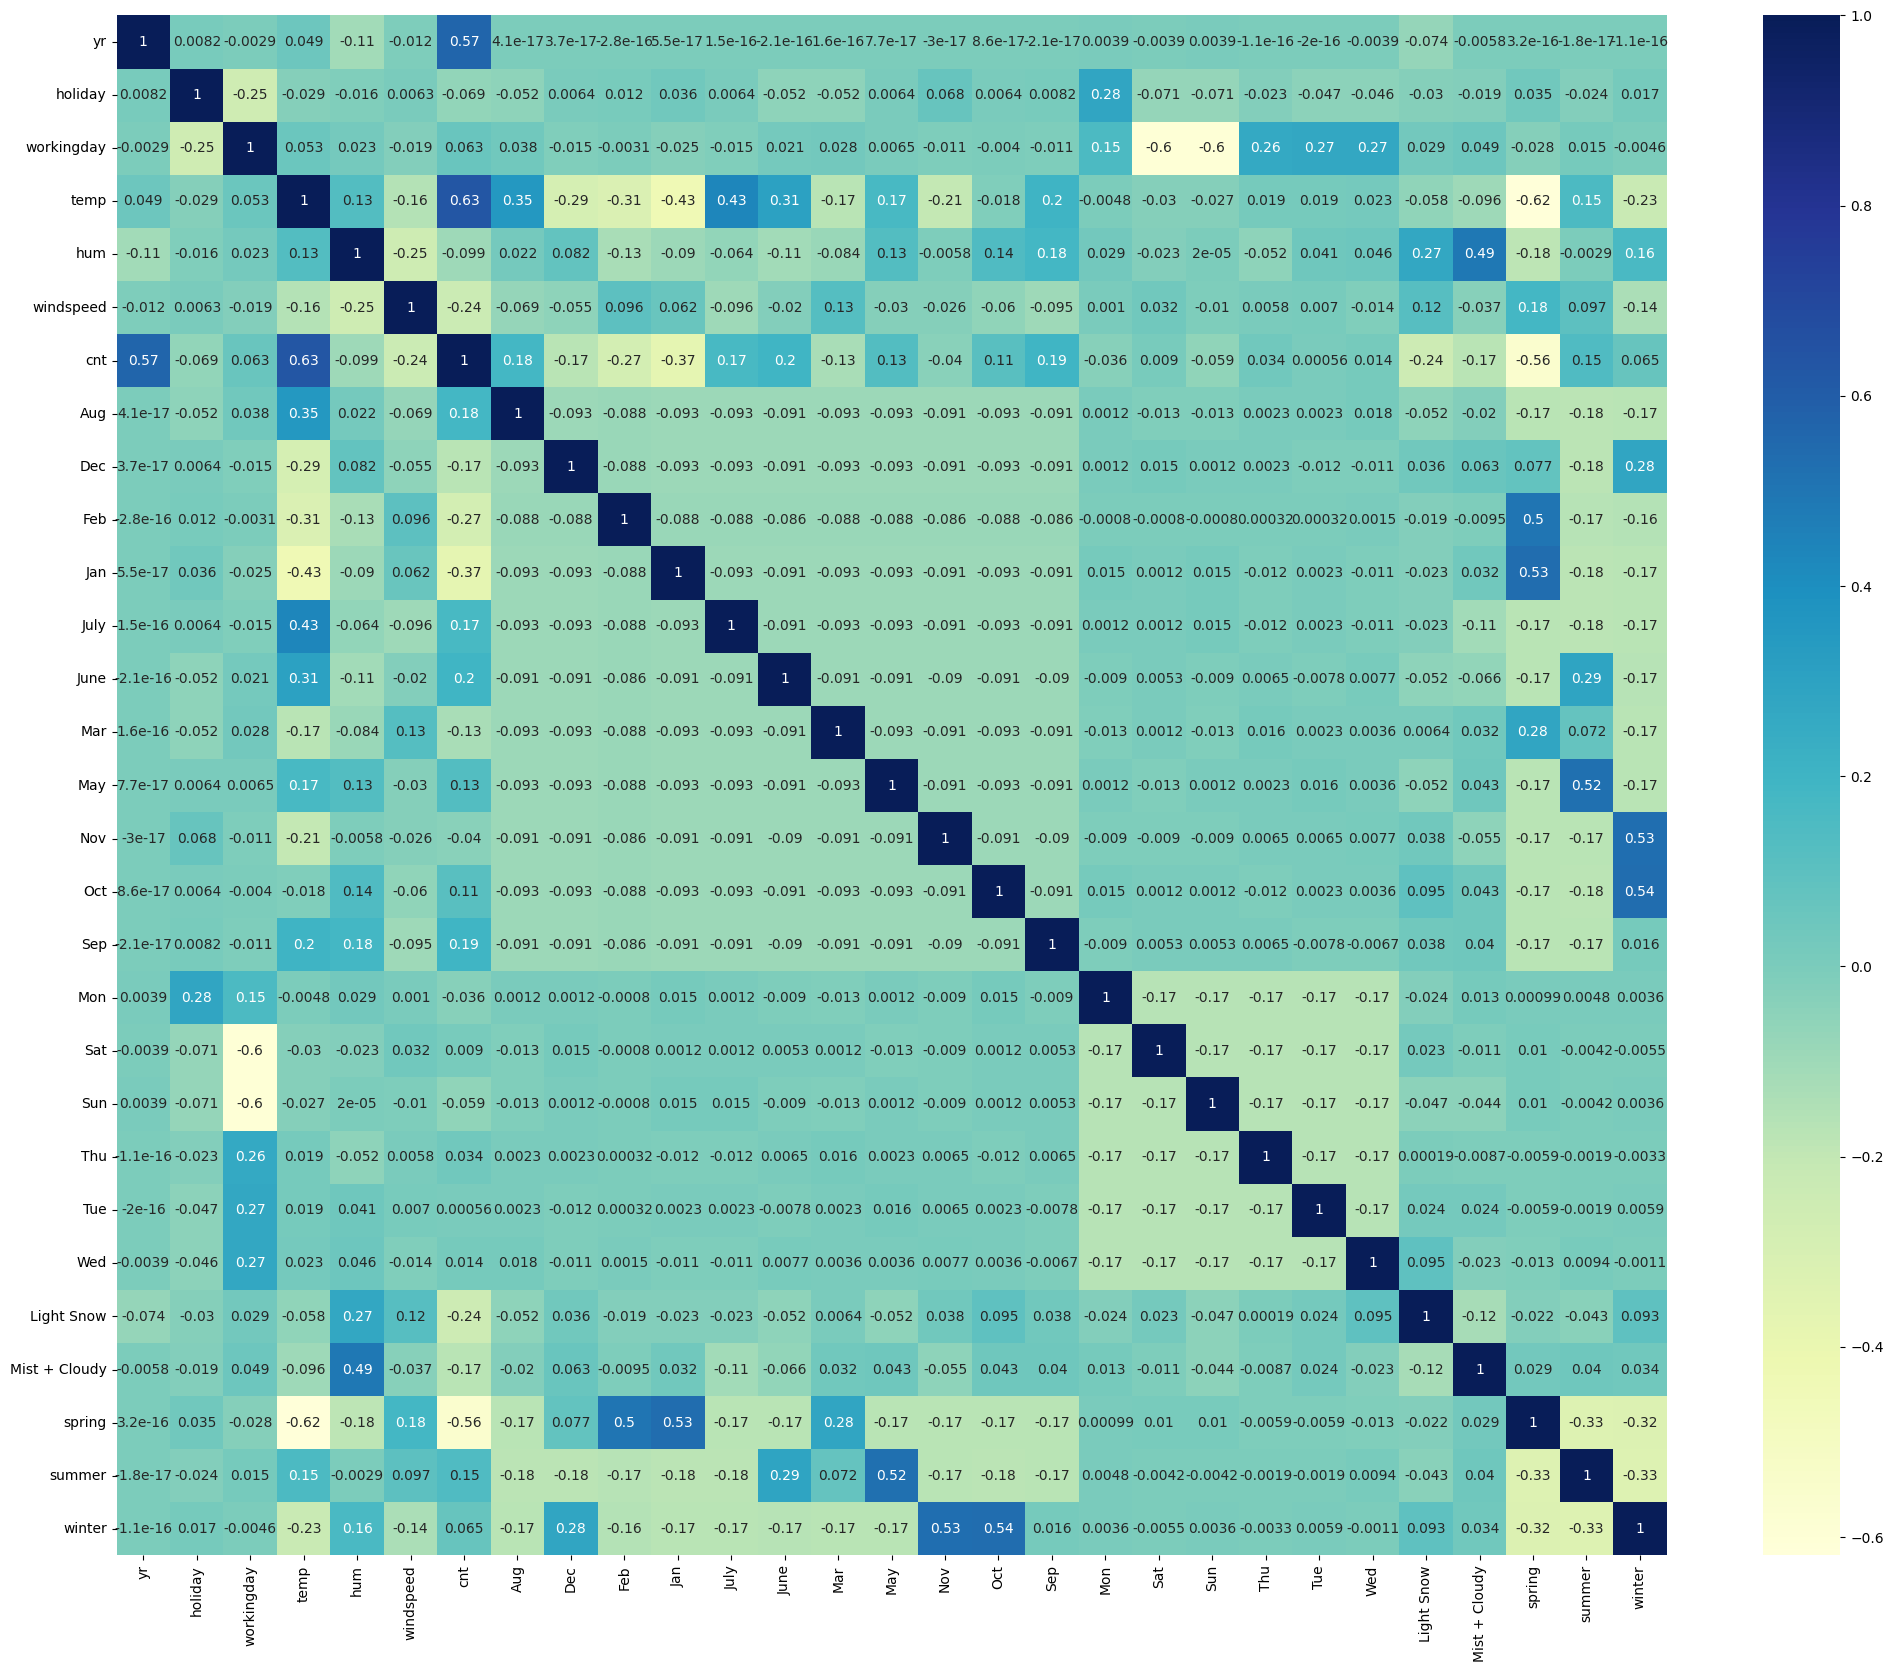

In [25]:
# Lets check the correlation between variables again
# Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(boombikes.corr(), cmap='YlGnBu', annot = True)
plt.show()

We can see that temperature, Summer season, June to october months are in good correlation with the 'cnt' variable. And seem to have good influence on the number of bike rentals.

## Step 4 : Splitting the Data into Training and Testing Sets

Lets prepare Train Test Split and Scale the features before building the model.

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
boombikes_train, boombikes_test = train_test_split(boombikes, train_size = 0.7, random_state = 100)

In [27]:
print(boombikes_train.shape)

print(boombikes_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (Normalisation - between 0 and 1) 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [28]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
boombikes_train[num_vars] = scaler.fit_transform(boombikes_train[num_vars])
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
# Lets describe the Trained Model
boombikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations : We can see that all the variables are mapped between 0 and 1.

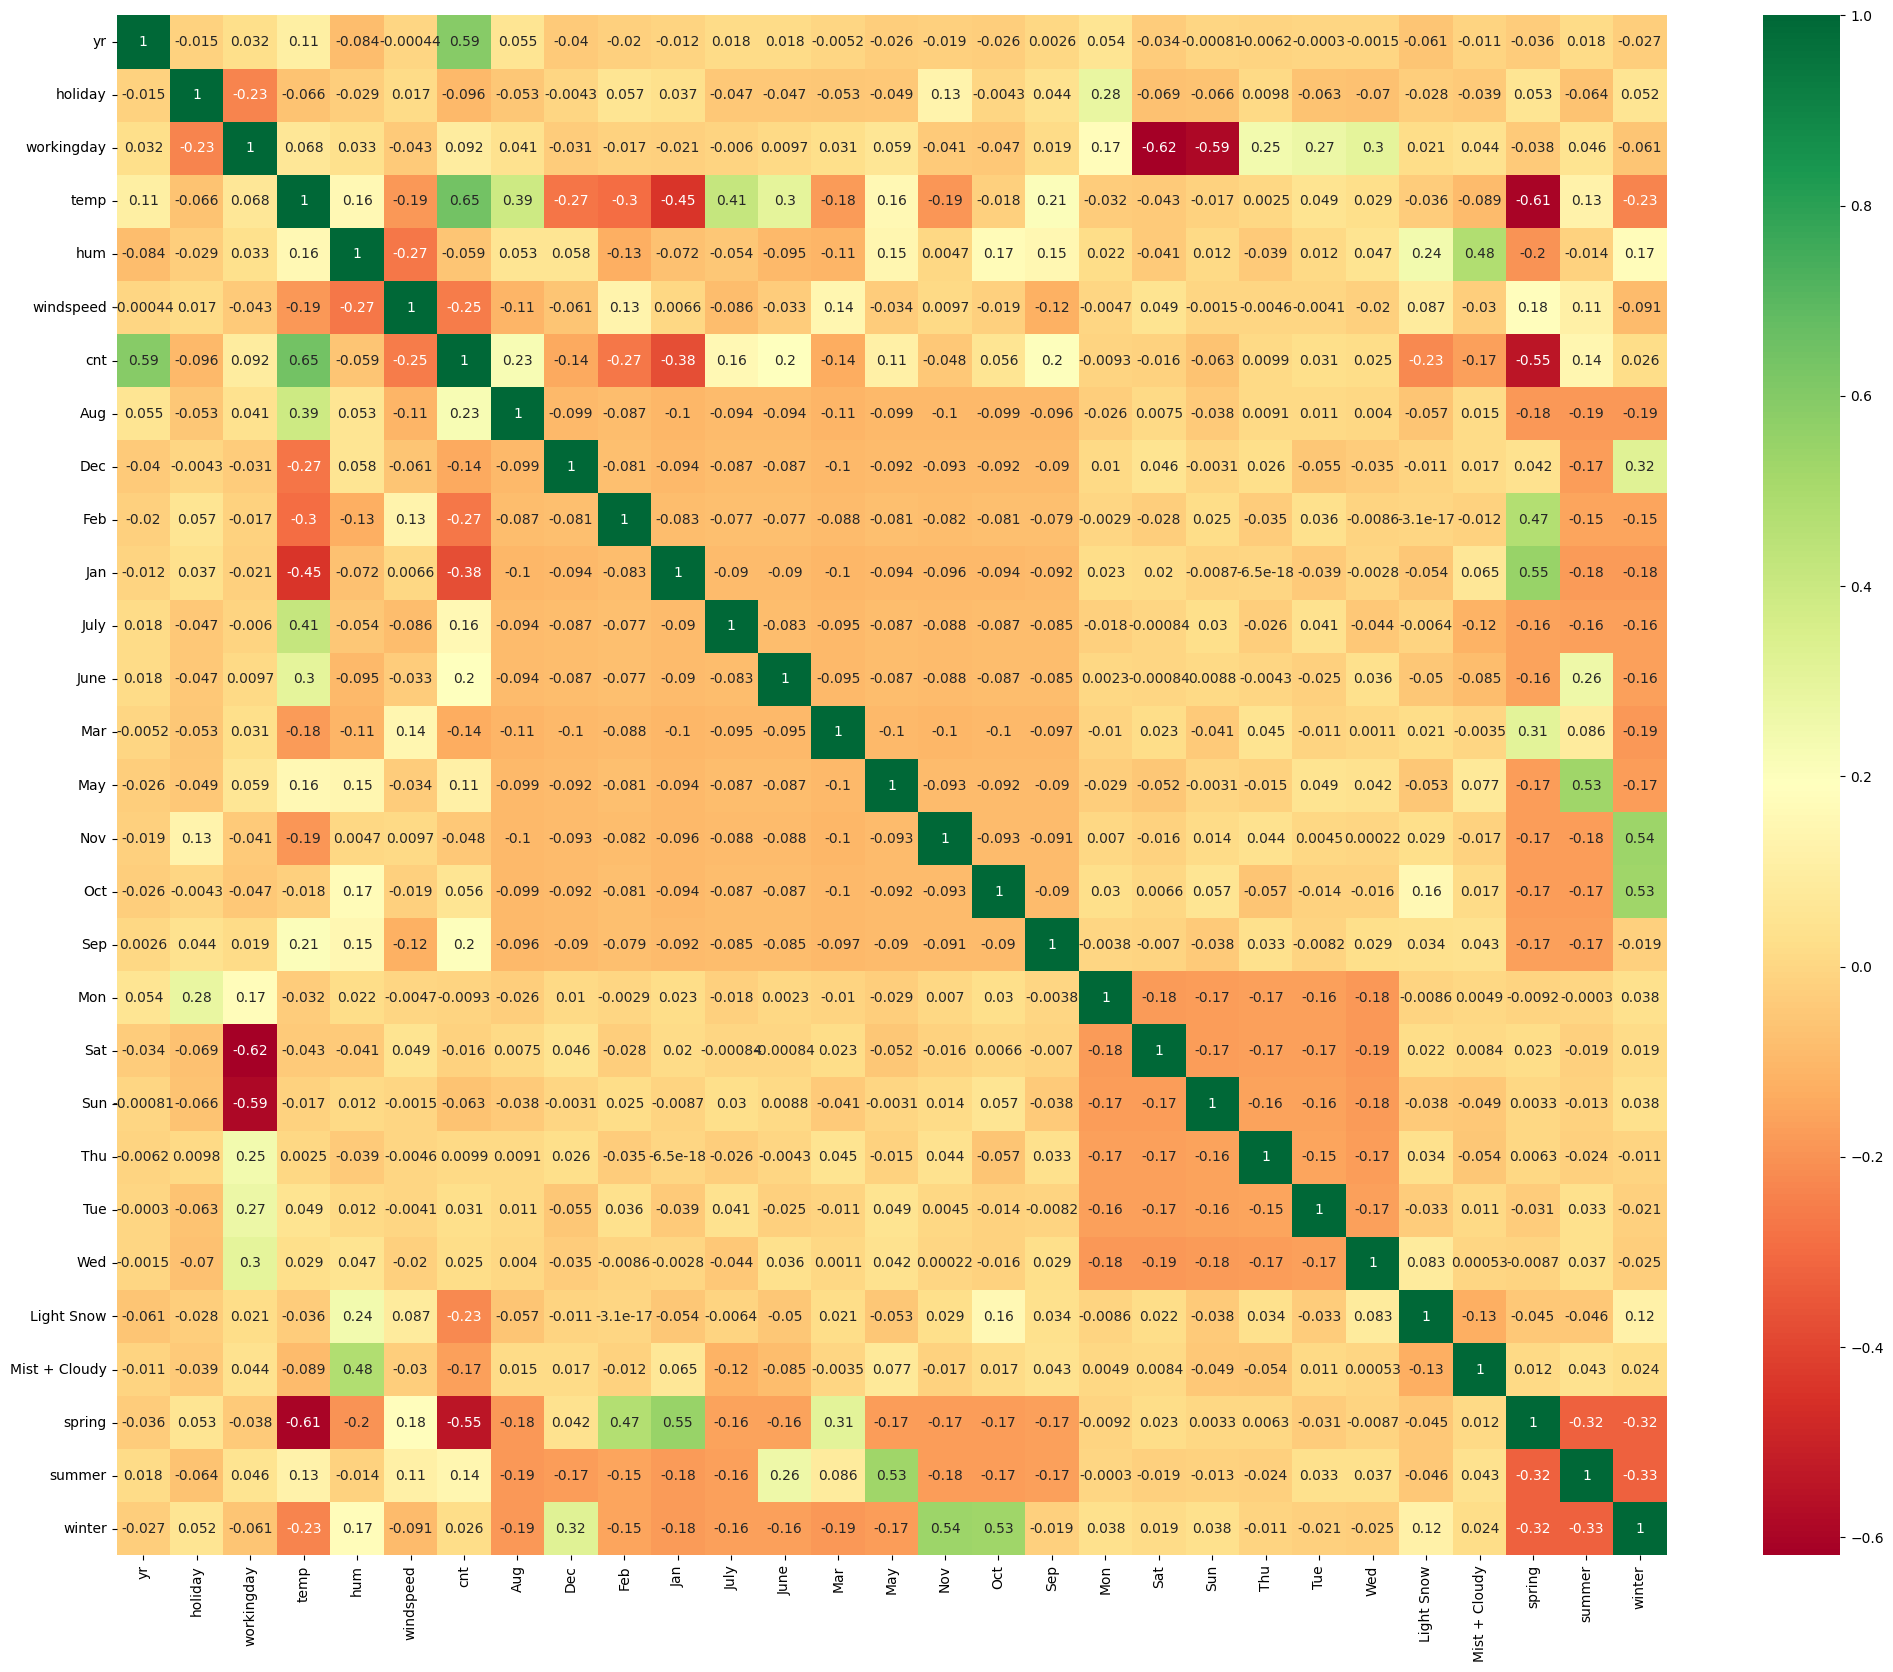

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(boombikes_train.corr(),cmap='RdYlGn',annot = True)
plt.show()

Observations : From the heatmap we can see temp, year are correlated to the 'cnt' variable. Even in August, September months we can see the counts are little high.

#### Lets Divide the dataset in to X and y sets for model building

In [31]:
# Divide the data into X and y
y_train = boombikes_train.pop('cnt')
X_train = boombikes_train

In [32]:
#checking the variables
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [33]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Step 5 : Building the Linear Model

### a. Linear Model using Stats Model

In [34]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [35]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           2.46e-61
Time:                        21:25:51   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations : R-squared is 0.416 which means 41% of the variance in the count quantity is explained by temp

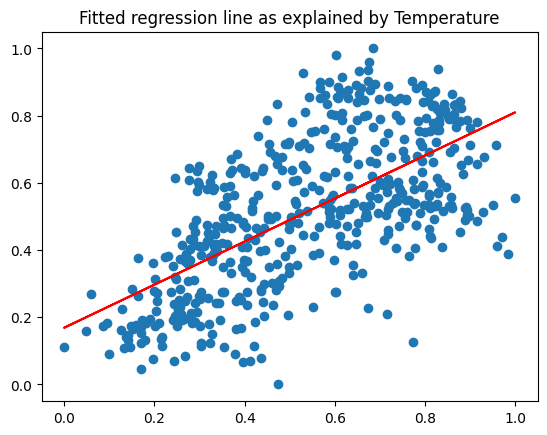

In [36]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by Temperature')
plt.show()

In [37]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [38]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.34e-130
Time:                        21:25:51   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations : R-squared is now 0.692 which means 69% of the variance in the count quantity is explained by temperature and year data

In [39]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [40]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [41]:
#checking summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.00e-181
Time:                        21:25:51   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.16e+15
================================================================

Observations : R-squared is now 0.853 which means 85% of the variance in the count quantity is explained with all the variables

### b. Linear Models using RFE

We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [42]:
#checking the number of columns in our dataset
len(boombikes.columns)

29

In [43]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(estimator=lm, n_features_to_select = 15) 

#fitting rfe object on our training dataset
rfe = rfe.fit(X_train, y_train)

In [44]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('Aug', np.False_, np.int64(8)),
 ('Dec', np.False_, np.int64(3)),
 ('Feb', np.False_, np.int64(4)),
 ('Jan', np.True_, np.int64(1)),
 ('July', np.True_, np.int64(1)),
 ('June', np.False_, np.int64(11)),
 ('Mar', np.False_, np.int64(14)),
 ('May', np.False_, np.int64(5)),
 ('Nov', np.False_, np.int64(2)),
 ('Oct', np.False_, np.int64(9)),
 ('Sep', np.True_, np.int64(1)),
 ('Mon', np.False_, np.int64(6)),
 ('Sat', np.True_, np.int64(1)),
 ('Sun', np.True_, np.int64(1)),
 ('Thu', np.False_, np.int64(10)),
 ('Tue', np.False_, np.int64(7)),
 ('Wed', np.False_, np.int64(12)),
 ('Light Snow', np.True_, np.int64(1)),
 ('Mist + Cloudy', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.False_, np.int64(13)),
 ('winter', np.True_, np.int64(1))]

In [45]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

In [46]:
#checking the values of true_rfe
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'winter'],
      dtype='object')

In [47]:
len(true_rfe)

15

In [48]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [49]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.252079
yr               0.231671
holiday         -0.005240
workingday       0.096773
temp             0.459647
hum             -0.143434
windspeed       -0.175777
Jan             -0.040492
July            -0.074631
Sep              0.059937
Sat              0.106817
Sun              0.053730
Light Snow      -0.252497
Mist + Cloudy   -0.057664
spring          -0.099167
winter           0.051694
dtype: float64

In [50]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.51e-190
Time:                        21:25:52   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2521      0.025      9.930      0.000       0.202       0.302
yr                0.2317      0.008     28.655      0.000       0.216       0.248
holiday          -0.0052      0.021     -0.246      0.806      -0.047       0.037
workingday        0.0968      0.009     10.442      0.000       0.079       0.115
temp              0.4596      0.031     14.626      0.000       0.398       0.521
hum              -0.1434      0.038     -3.822      0.000      -0.217      -0.070
windspeed        -0.1758      0.026     -6.875      0.000      -0.226      -0.126
Jan              -0.0405      0.017     -2.321      0.021      -0.075      -0.006
July             -0.0746      0.017     -4.368      0.000      -0.108      -0.041
Sep               0.0599      0.015      3.896      0.000       0.030       0.090
Sat               0.1068      0.011      9.382      0.000       0.084       0.129
Sun               0.0537      0.012      4.494      0.000       0.030       0.077
Light Snow       -0.2525      0.026     -9.613      0.000      -0.304      -0.201
Mist + Cloudy    -0.0577      0.010     -5.513      0.000      -0.078      -0.037
spring           -0.0992      0.015     -6.499      0.000      -0.129      -0.069
winter            0.0517      0.012      4.169      0.000       0.027       0.076
==============================================================================
Omnibus:                       62.892   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.883
Skew:                          -0.628   Prob(JB):                     1.91e-35
Kurtosis:                       5.438   Cond. No.                     6.77e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [52]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,41.54
9,Sat,10.13
10,Sun,9.81
3,temp,3.19
13,spring,2.71
1,holiday,2.58
4,hum,1.89
14,winter,1.81
12,Mist + Cloudy,1.57
6,Jan,1.55


#### How to check the conditions for variables elimination?
    Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

    High p-value, high VIF : definitely drop

    High-Low:

    High p, low VIF : remove these first, then build model again and check VIF again
    Low p, high VIF : remove these later
    Low p-value, low VIF : keep variable

In [53]:
#workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [54]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.51e-190
Time:                        21:25:52   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3489      0.031     11.208      0.000       0.288       0.410
yr                0.2317      0.008     28.655      0.000       0.216       0.248
holiday          -0.1020      0.026     -3.988      0.000      -0.152      -0.052
temp              0.4596      0.031     14.626      0.000       0.398       0.521
hum              -0.1434      0.038     -3.822      0.000      -0.217      -0.070
windspeed        -0.1758      0.026     -6.875      0.000      -0.226      -0.126
Jan              -0.0405      0.017     -2.321      0.021      -0.075      -0.006
July             -0.0746      0.017     -4.368      0.000      -0.108      -0.041
Sep               0.0599      0.015      3.896      0.000       0.030       0.090
Sat               0.0100      0.011      0.894      0.372      -0.012       0.032
Sun              -0.0430      0.012     -3.697      0.000      -0.066      -0.020
Light Snow       -0.2525      0.026     -9.613      0.000      -0.304      -0.201
Mist + Cloudy    -0.0577      0.010     -5.513      0.000      -0.078      -0.037
spring           -0.0992      0.015     -6.499      0.000      -0.129      -0.069
winter            0.0517      0.012      4.169      0.000       0.027       0.076
==============================================================================
Omnibus:                       62.892   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.883
Skew:                          -0.628   Prob(JB):                     1.91e-35
Kurtosis:                       5.438   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [55]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [56]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,23.54
2,temp,15.97
4,windspeed,4.07
12,spring,2.91
11,Mist + Cloudy,2.26
13,winter,2.12
0,yr,2.07
5,Jan,1.67
6,July,1.41
8,Sat,1.23


In [57]:
#hum variable can be dropped due to high VIF
X_train_new_2 = X_train_lr1.drop(['hum'], axis = 1)

Rebuild the model after removing Sat

In [58]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          8.52e-188
Time:                        21:25:52   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     496   BIC:                            -925.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2730      0.024     11.231      0.000       0.225       0.321
yr                0.2352      0.008     28.886      0.000       0.219       0.251
holiday          -0.1025      0.026     -3.955      0.000      -0.153      -0.052
temp              0.4307      0.031     13.931      0.000       0.370       0.491
windspeed        -0.1492      0.025     -5.982      0.000      -0.198      -0.100
Jan              -0.0442      0.018     -2.501      0.013      -0.079      -0.009
July             -0.0675      0.017     -3.919      0.000      -0.101      -0.034
Sep               0.0569      0.016      3.653      0.000       0.026       0.087
Sat               0.0117      0.011      1.025      0.306      -0.011       0.034
Sun              -0.0459      0.012     -3.895      0.000      -0.069      -0.023
Light Snow       -0.2921      0.024    -11.939      0.000      -0.340      -0.244
Mist + Cloudy    -0.0806      0.009     -9.294      0.000      -0.098      -0.064
spring           -0.1020      0.015     -6.602      0.000      -0.132      -0.072
winter            0.0426      0.012      3.454      0.001       0.018       0.067
==============================================================================
Omnibus:                       65.698   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.520
Skew:                          -0.658   Prob(JB):                     1.14e-36
Kurtosis:                       5.461   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [60]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.76
3,windspeed,4.05
11,spring,2.27
0,yr,2.06
4,Jan,1.60
10,Mist + Cloudy,1.54
12,winter,1.43
5,July,1.36
7,Sat,1.23
8,Sun,1.21


In [61]:
#Sat variable can be dropped due to a high p value and low VIF
X_train_new_3 = X_train_lr2.drop(['Sat'], axis = 1)

In [62]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.55e-189
Time:                        21:25:52   Log-Likelihood:                 505.71
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     497   BIC:                            -930.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2751      0.024     11.360      0.000       0.228       0.323
yr                0.2349      0.008     28.867      0.000       0.219       0.251
holiday          -0.1049      0.026     -4.060      0.000      -0.156      -0.054
temp              0.4300      0.031     13.913      0.000       0.369       0.491
windspeed        -0.1480      0.025     -5.939      0.000      -0.197      -0.099
Jan              -0.0440      0.018     -2.492      0.013      -0.079      -0.009
July             -0.0670      0.017     -3.894      0.000      -0.101      -0.033
Sep               0.0570      0.016      3.662      0.000       0.026       0.088
Sun              -0.0481      0.012     -4.153      0.000      -0.071      -0.025
Light Snow       -0.2921      0.024    -11.937      0.000      -0.340      -0.244
Mist + Cloudy    -0.0807      0.009     -9.298      0.000      -0.098      -0.064
spring           -0.1019      0.015     -6.596      0.000      -0.132      -0.072
winter            0.0429      0.012      3.483      0.001       0.019       0.067
==============================================================================
Omnibus:                       61.604   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.659
Skew:                          -0.607   Prob(JB):                     1.30e-35
Kurtosis:                       5.467   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [64]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.70
3,windspeed,4.01
10,spring,2.26
0,yr,2.06
4,Jan,1.60
9,Mist + Cloudy,1.54
11,winter,1.41
5,July,1.36
6,Sep,1.20
7,Sun,1.18


In [65]:
#Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

In [66]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.48e-182
Time:                        21:25:52   Log-Likelihood:                 488.22
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     498   BIC:                            -901.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2101      0.022      9.407      0.000       0.166       0.254
yr                0.2336      0.008     27.771      0.000       0.217       0.250
holiday          -0.1078      0.027     -4.039      0.000      -0.160      -0.055
temp              0.4567      0.032     14.445      0.000       0.395       0.519
Jan              -0.0293      0.018     -1.622      0.105      -0.065       0.006
July             -0.0641      0.018     -3.604      0.000      -0.099      -0.029
Sep               0.0651      0.016      4.059      0.000       0.034       0.097
Sun              -0.0481      0.012     -4.021      0.000      -0.072      -0.025
Light Snow       -0.3060      0.025    -12.153      0.000      -0.355      -0.257
Mist + Cloudy    -0.0794      0.009     -8.856      0.000      -0.097      -0.062
spring           -0.1050      0.016     -6.580      0.000      -0.136      -0.074
winter            0.0532      0.013      4.215      0.000       0.028       0.078
==============================================================================
Omnibus:                       71.049   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.002
Skew:                          -0.666   Prob(JB):                     3.05e-45
Kurtosis:                       5.806   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [68]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.13
0,yr,2.05
9,spring,1.83
3,Jan,1.60
8,Mist + Cloudy,1.53
10,winter,1.35
4,July,1.34
5,Sep,1.19
6,Sun,1.17
7,Light Snow,1.07


In [69]:
#Jan column can be dropped due to its high p value and low VIF
X_train_new_5 = X_train_lr4.drop(['Jan'], axis = 1)

In [70]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.45e-183
Time:                        21:25:52   Log-Likelihood:                 486.88
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     499   BIC:                            -905.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2030      0.022      9.254      0.000       0.160       0.246
yr                0.2331      0.008     27.686      0.000       0.217       0.250
holiday          -0.1082      0.027     -4.048      0.000      -0.161      -0.056
temp              0.4682      0.031     15.176      0.000       0.408       0.529
July             -0.0667      0.018     -3.757      0.000      -0.102      -0.032
Sep               0.0641      0.016      3.994      0.000       0.033       0.096
Sun              -0.0479      0.012     -3.995      0.000      -0.071      -0.024
Light Snow       -0.3045      0.025    -12.083      0.000      -0.354      -0.255
Mist + Cloudy    -0.0801      0.009     -8.931      0.000      -0.098      -0.063
spring           -0.1115      0.015     -7.208      0.000      -0.142      -0.081
winter            0.0556      0.013      4.430      0.000       0.031       0.080
==============================================================================
Omnibus:                       69.150   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.241
Skew:                          -0.646   Prob(JB):                     3.30e-44
Kurtosis:                       5.784   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [72]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.08
0,yr,2.05
7,Mist + Cloudy,1.51
9,winter,1.35
3,July,1.33
8,spring,1.27
4,Sep,1.19
5,Sun,1.17
6,Light Snow,1.07
1,holiday,1.05


##### Several points to be noted as we select this model as the final model:

1) The model selection depends on several factor such as the p-value, the VIF and the R-squared value. The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

2) The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis. 

3) The VIF should be generally <5 and we have achieved that condition with all the variables. 

4) The R-squared value achieved is 82.7% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count. 

## Step 6: Residual analysis

In [73]:
X_train_lr6 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr6

,const,yr,holiday,temp,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,winter
576,1.0,1,0,0.815169,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0,0,1,0,0,1,0
482,1.0,1,0,0.395666,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0,0,0,0,1,0,0


In [74]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr6)

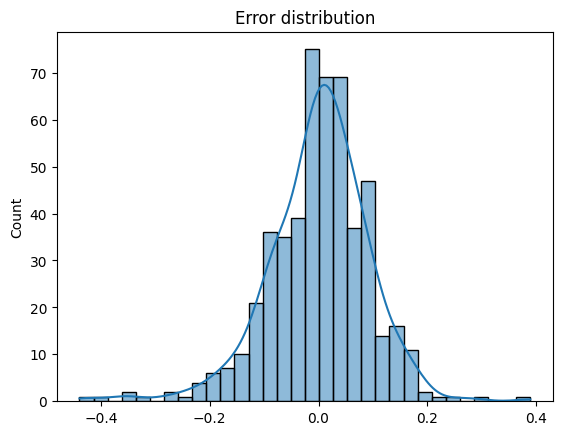

In [75]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.histplot(res, kde=True)
plt.title('Error distribution')
plt.show()

#### Making Predictions on Test Set using Scaling 

In [76]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [77]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
boombikes_test[num_vars] = scaler.transform(boombikes_test[num_vars])

In [78]:
boombikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = boombikes_test.pop('cnt')
X_test = boombikes_test

In [80]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [81]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [82]:
#Printing feature variables

X_train_lr6.columns

Index(['const', 'yr', 'holiday', 'temp', 'July', 'Sep', 'Sun', 'Light Snow',
       'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

In [83]:
#dropping constant
X_train_lr6.drop(columns= 'const', inplace = True)

In [84]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr6.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [85]:
#making predictions
y_pred = lr_model.predict(X_test_new)

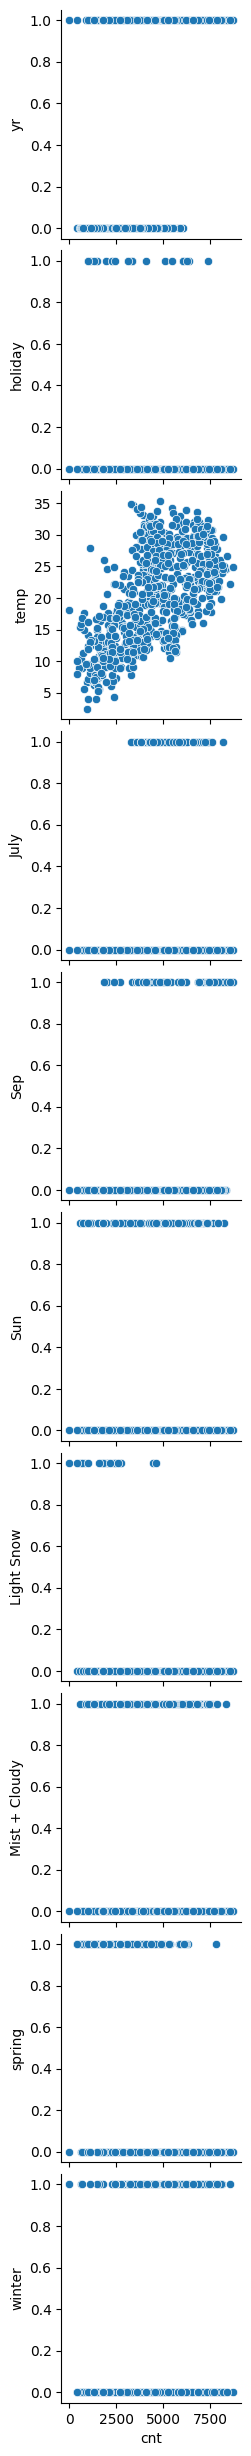

<Figure size 1600x1200 with 0 Axes>

In [86]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(boombikes, y_vars=X_train_lr6.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

##### We can now validate the assumptions of linear regression in the model:

As we can see, temperature has a linear relationship with the dependent variable (cnt). 

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity. 

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

## Step 7: Prediction and evaluation of the test set

In [87]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8121351121082305


In [88]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8274016471964597


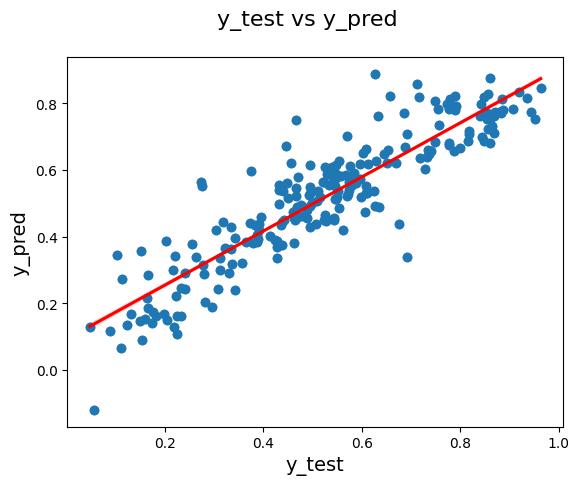

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

##### Equation of the best fitted line is:
    cnt = 0.2331*yr - 0.1082*holiday + 0.4682*temp - 0.0667*July + 0.0641*Sep - 0.0479*Sun - 0.3045*LightSnow - 0.0801*MistCloudy - 0.1115*spring + 0.0556*winter + 0.2030

In [90]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008675822950852612
Mean squared error of the test set is 0.008982624259295574


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1) The R-squared value of the train set is 82.74% whereas the test set has a value of 81.21% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model. 

2) Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.  

3) We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September and October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays. 

4) These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers. 